In [66]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import cv2 
from PIL import Image
import matplotlib.pylab as plt

In [67]:
np.random.seed(0)
X = np.random.rand(10, 5)
X

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443],
       [0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194],
       [0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ],
       [0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672],
       [0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077]])

In [68]:
# four components
svd = TruncatedSVD(n_components=5, n_iter=10, random_state=5)

In [69]:
U = svd.fit_transform(X)
Sigma = np.diag(svd.singular_values_)
V = svd.components_

In [70]:
print(U.shape, Sigma.shape, V.shape)

(10, 5) (5, 5) (5, 5)


In [71]:
np.dot(np.dot(U, Sigma), V)

array([[2.27259896, 2.06158334, 2.46183074, 2.58780602, 1.54340087],
       [2.74666523, 2.20738782, 3.16862912, 3.40817838, 1.88325806],
       [2.6667806 , 2.15812634, 2.56194733, 3.08177612, 1.327674  ],
       [1.62887362, 1.24381028, 2.67343966, 2.53979392, 2.04673003],
       [2.94346328, 2.48370961, 2.57094406, 3.1098507 , 1.35514735],
       [2.21067885, 1.56868991, 2.70824257, 2.54688789, 1.67711744],
       [1.69831375, 1.78818973, 1.80695841, 2.097824  , 0.8902267 ],
       [2.72609068, 2.3137789 , 3.02810613, 3.36470173, 2.05205726],
       [1.54930794, 1.35536686, 2.06728292, 1.65610974, 1.53967644],
       [1.5679099 , 1.09190304, 1.30771411, 1.51151511, 0.94316607]])

In [72]:
np.matmul(np.matmul(U, Sigma), V.T)

array([[ 2.3495806 , -1.88827484,  0.78970131, -3.84418424,  0.2584129 ],
       [ 2.77738095, -2.52837238,  1.17998839, -4.70312343,  0.03205722],
       [ 2.20816195, -2.00847798,  0.80075627, -4.4760596 ,  0.08112534],
       [ 2.40551838, -2.4175092 ,  1.26306358, -2.95952118, -0.047594  ],
       [ 2.32508048, -1.94032643,  0.72402693, -4.81323999,  0.29627434],
       [ 2.32278212, -2.02221309,  1.24665919, -3.59710271,  0.06211252],
       [ 1.74591074, -1.3173955 ,  0.3115341 , -3.10734894,  0.06287888],
       [ 2.81095751, -2.60320275,  1.08276074, -4.64538772,  0.23786992],
       [ 2.03660725, -1.50161448,  0.91186747, -2.50957124,  0.30376112],
       [ 1.17372552, -1.1187932 ,  0.59160414, -2.33710107,  0.30591399]])

In [73]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

In [74]:
S

array([3.94519738, 1.21138347, 0.69705256, 0.63036923, 0.51134867])

In [75]:
print(U.shape, S.shape, VT.shape)

(10, 5) (5,) (5, 5)


In [76]:
np.matmul(U, np.diag(S))

array([[-1.25491   ,  0.08492278, -0.22980999, -0.13121341,  0.0188753 ],
       [-1.55398623, -0.06464147,  0.21963852, -0.00332326, -0.11086173],
       [-1.37338843,  0.37307885,  0.23979216,  0.07182655, -0.05445466],
       [-1.16201854, -0.80017699,  0.21541507, -0.10349451,  0.12657057],
       [-1.44400917,  0.57775832, -0.05843195,  0.09789682,  0.02368282],
       [-1.2368383 , -0.29011509,  0.0296516 ,  0.24195724, -0.3055493 ],
       [-0.95901358,  0.32708128, -0.0357908 , -0.40830827, -0.07927782],
       [-1.55130133, -0.07590001,  0.01112597, -0.06676929,  0.2745963 ],
       [-0.92438443, -0.36663671, -0.50710194, -0.01538503, -0.09401582],
       [-0.73672672,  0.10701203, -0.13443948,  0.3531708 ,  0.21306599]])

In [77]:
np.matmul(np.matmul(U, np.diag(S)), VT)

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443],
       [0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194],
       [0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ],
       [0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672],
       [0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077]])

In [78]:
imgpath = '../data/wolf.jpeg'
img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

In [79]:
img

array([[7, 2, 0, ..., 0, 0, 5],
       [7, 2, 0, ..., 0, 1, 6],
       [7, 2, 0, ..., 0, 1, 6],
       ...,
       [5, 2, 0, ..., 0, 2, 7],
       [5, 2, 0, ..., 0, 2, 7],
       [5, 2, 0, ..., 0, 1, 6]], dtype=uint8)

In [80]:
Image.fromarray(img).show()

In [81]:
img.shape

(360, 540)

In [82]:
U, S, VT = np.linalg.svd(img, full_matrices=False)

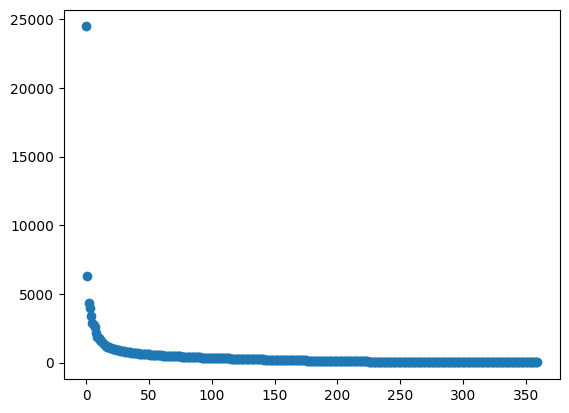

In [83]:
plt.scatter([i for i in range(360)], S)

In [84]:
for k in range(0, 100, 10):
  Us = U[:,:k]
  Ss = S[:k]
  VTs = VT[:k,:]
  ratio=4*k*(Us.shape[0] + VTs.shape[1]) / (Us.shape[0] * VTs.shape[1])
  imgs = np.dot(np.dot(Us, np.diag(Ss)), VTs)
  cv2.imwrite(f'../data/out/wolf_k={k}_r={ratio}.jpeg', imgs) 

In [85]:
img_origin = np.dot(np.dot(U, np.diag(S)), VT)

In [86]:
cv2.imwrite(f'../data/out/wolf_origin.jpeg', img_origin) 

True